In [1]:
from pathlib import Path
from brainlit.utils.swc import read_swc_offset
from brainlit.algorithms.connect_fragments.fit_spline import GeometricGraph
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import splev

# fit_spline_tree_invriant tutorial

## 1) Define variables
- `swc` the geometric graph
- `df,_,_,_` read the x, y, and z columns in swc file
- `neuron` define a new class inherited from `GeometricGraph` class

In [6]:
swc = Path(
    "C:/Users/user/brainlit/data/data_octree/consensus-swcs/2018-08-01_G-002_consensus.swc"
)

df,_,_,_ = read_swc_offset(swc)

neuron = GeometricGraph()

## 2) Extract data from swc and initiate neuron tree
- `samp` data extrated from `sample` coloumn of swc
- `loc` data extracted from `x`, `y`, and `z` columns of swc
- `soma` define the data on the first run as the location of soma
- `neuron` the neuron tree contains the sample index (integer number), the location in 3-D space (x,y,z), parent index (integer)
- `par` the current data's parent index will be added to `neuron` if already defined in swc; otherwise, raise error

In [7]:
first = True
for row in df.itertuples(index=False):
    samp = row.sample
    loc = np.array([row.x, row.y, row.z])
    if first:
        soma = loc
        first = False
    neuron.add_node(samp, loc=loc)
    # print(neuron.nodes[samp]['loc'])
    # raise ValueError
    par = row.parent
    if par != -1:
        if par > samp:
            raise ValueError("Parent has not been added yet")
        neuron.add_edge(samp, par)

## 3) Plot the whole spline tree
- `spline_tree` use the `fit_spline_tree_invariant` to locate neuron branches

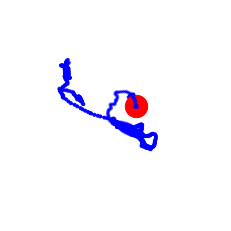

In [11]:

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
spline_tree = neuron.fit_spline_tree_invariant()
for node in spline_tree.nodes:
    path = spline_tree.nodes[node]["path"]
    locs = np.zeros((len(path),3))
    for p,point in enumerate(path):
        locs[p,:] = neuron.nodes[point]["loc"]
    ax.scatter(locs[:,0], locs[:,1], locs[:,2], c='b', s=9)
    ax.plot(locs[:,0], locs[:,1], locs[:,2], 'b-')
ax.scatter(soma[0],soma[1],soma[2], c='r', s=500)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')
plt.show()


## 4) Plot each branch in separate plots

In [ ]:
for node in spline_tree.nodes:
    path = spline_tree.nodes[node]["path"]
    locs = np.zeros((len(path),3))
    for p,point in enumerate(path):
        locs[p,:] = neuron.nodes[point]["loc"]

    spline = spline_tree.nodes[node]["spline"]
    u = spline[1]
    u = np.arange(u[0], u[-1]+0.9, 1)
    tck = spline[0]
    pts = splev(u, tck)
    
    fig = plt.figure()
    ax = fig.add_subplot(111,projection="3d")
    #ax.scatter(locs[:,0], locs[:,1], locs[:,2], 'blue')
    ax.plot(pts[0], pts[1], pts[2], 'red')
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    # Hide grid lines
    ax.grid(False)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    plt.axis('off')
    plt.show()